## **Job Market Analysis: Roles, Salaries, Skills, and Hiring Trends**

## **Executive Summary**

This analysis explores hiring trends, salary patterns, skill demand, and location-based compensation across job roles.
The results show that quantum computing and AI/ML roles offer the highest average salaries, New York has the most job
openings, Berlin offers the highest top-end salaries, and hiring follows a seasonal pattern with peaks in December and
mid-year months.


## **Imports & Config**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **DataLoading**

In [42]:
data=pd.read_csv("G:\\job_analysis project\\jobs_dataset.csv")

## **Data Understanding**

In [43]:
data.head()

,job_id,job_title,industry,location,salary_usd,skills_required,remote_option,company_size,posting_date
0,1,Quantum Researcher,Quantum Computing,Singapore,175780,"Linear Algebra, Quantum Algorithms",No,Large,2025-07-22
1,2,Renewable Energy Engineer,Green Tech,Singapore,137481,"Climate Data Analysis, Energy Modeling",Yes,Large,2025-09-26
2,3,Quantum Researcher,Quantum Computing,Tokyo,182081,"Linear Algebra, Qiskit",No,Medium,2025-12-31
3,4,Sustainability Analyst,Green Tech,Singapore,113822,"Climate Data Analysis, Energy Modeling",No,Large,2025-05-29
4,5,Smart Contract Engineer,Blockchain,London,92575,"Rust, Solidity",Yes,Small,2025-03-30


## **Research Questions**
### **Salary & Compensation**
- Which job titles pay the most and least?
- Does location significantly affect salary?
- Do larger companies pay more than smaller ones?
### **Skills & Demand**
- Which skills are most in demand?
- Which skills are linked to higher salaries?
### **Industry & Company Size**
- Which industries are hiring the most?
- Which industries pay the highest salaries?
### **Location**
- Which locations have the most job openings?
- Which locations offer the highest pay?
### **Time & Trends**
- Is hiring increasing or decreasing over time?

In [44]:
data.columns

Index(['job_id', 'job_title', 'industry', 'location', 'salary_usd',
       'skills_required', 'remote_option', 'company_size', 'posting_date'],
      dtype='object')

## **Columns Info**
- **Job_id** :- A unique identifier for each job posting. Used to distinguish one job from another.
- **Job_title** :-  The name of the position being offered (e.g., Data Analyst, Software Engineer).
- **Industry** :- The sector or field the company operates in (e.g., IT, Healthcare, Finance).
- **Location** :- The geographical location of the job (city, state, country, or region).
- **Salary_usd** :- The offered salary for the job, expressed in US dollars.
- **Skills_requried** :- A list or description of skills needed for the role (e.g., Python, SQL, Communication).
- **Remote_option**   :- Indicates whether the job can be done remotely (e.g., Yes/No).
- **Company_size**    :- The size of the company, usually based on number of employees (e.g., Small, Medium, Large).
- **Posting_date**    :- The date when the job was posted.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_id           10000 non-null  int64 
 1   job_title        10000 non-null  object
 2   industry         10000 non-null  object
 3   location         10000 non-null  object
 4   salary_usd       10000 non-null  int64 
 5   skills_required  10000 non-null  object
 6   remote_option    10000 non-null  object
 7   company_size     10000 non-null  object
 8   posting_date     10000 non-null  object
dtypes: int64(2), object(7)
memory usage: 703.3+ KB


## **Observatation**
- Columns names should properly capatilize
- posting_date datatype should be change into Date-Time datatype 

In [46]:
data.describe()

,job_id,salary_usd
count,10000.00000,10000.000000
mean,5000.50000,150131.524800
std,2886.89568,57534.947278
min,1.00000,50013.000000
25%,2500.75000,100568.000000
50%,5000.50000,150398.500000
75%,7500.25000,199225.250000
max,10000.00000,249990.000000


## **Statistics Analysis**
- There are no missing values in salary_usd.
- The coefficient of variation (0.38) indicates moderate relative variability.
- Mean and median are nearly equal, suggesting the data is approximately symmetric.
- The salary range is wide, but no statistical outliers are detected using the IQR method.
- Quartile spacing indicates no strong skewness.
- 25%, 50%, and 75% percentile interpretations are correct.
- The high maximum salary suggests a slight right skew, typical of salary distributions.

In [47]:
data.describe(include='object')

,job_title,industry,location,skills_required,remote_option,company_size,posting_date
count,10000,10000,10000,10000,10000,10000,10000
unique,9,4,6,20,2,3,365
top,Quantum Software Developer,Quantum Computing,New York,"Energy Modeling, Climate Data Analysis",Yes,Large,2025-12-03
freq,1278,2519,1689,1255,5089,3385,44


## **Statistics Analysis On Categoical Columns**
- There are no missing values in any of the categorical columns (job_title, industry, location, skills_required, remote_option, company_size, posting_date).
- The job_title column contains 9 unique roles, with Quantum Software Developer being the most frequent, indicating concentration in a few key positions.
- The industry column has 4 unique categories, and Quantum Computing dominates, showing that most jobs are directly related to core quantum technologies.
- The location column includes 6 unique locations, with New York being the most common, suggesting geographic concentration in major hubs.
- The skills_required column shows 20 unique skill combinations, highlighting diversity and interdisciplinarity in required skill sets.
- The remote_option column has 2 categories, with remote jobs being slightly more common, reflecting flexibility in the job market.
- The company_size column includes 3 categories, and large companies account for the highest number of postings, indicating stronger hiring activity by     larger organizations.
- The posting_date column spans 365 unique dates, covering a full year, which suggests consistent and continuous hiring rather than seasonal trends.

## **Data Cleaning**

In [48]:
#checking duplicates
data[data.duplicated()]

,job_id,job_title,industry,location,salary_usd,skills_required,remote_option,company_size,posting_date


## **Observatation**
- There is no duplicates in data 

In [49]:
#Checking null values in each column
data.isnull().sum()

job_id             0
job_title          0
industry           0
location           0
salary_usd         0
skills_required    0
remote_option      0
company_size       0
posting_date       0
dtype: int64

## **Observatation**
- There is no null values in data

In [50]:
# making columns names Capitalize
data.columns = data.columns.str.capitalize()

In [51]:
data.head()

,Job_id,Job_title,Industry,Location,Salary_usd,Skills_required,Remote_option,Company_size,Posting_date
0,1,Quantum Researcher,Quantum Computing,Singapore,175780,"Linear Algebra, Quantum Algorithms",No,Large,2025-07-22
1,2,Renewable Energy Engineer,Green Tech,Singapore,137481,"Climate Data Analysis, Energy Modeling",Yes,Large,2025-09-26
2,3,Quantum Researcher,Quantum Computing,Tokyo,182081,"Linear Algebra, Qiskit",No,Medium,2025-12-31
3,4,Sustainability Analyst,Green Tech,Singapore,113822,"Climate Data Analysis, Energy Modeling",No,Large,2025-05-29
4,5,Smart Contract Engineer,Blockchain,London,92575,"Rust, Solidity",Yes,Small,2025-03-30


In [52]:
#checking outliers 
Q1=data['Salary_usd'].quantile(0.25)
Q2=data['Salary_usd'].quantile(0.50)
Q3=data['Salary_usd'].quantile(0.75)
IQR=Q3-Q1
upper_fence = Q3+1.5*(IQR)
lower_fence = Q1-1.5*(IQR)
print(upper_fence)
print(lower_fence)

347211.125
-47417.875


In [53]:
outliers = data[
    (data['Salary_usd'] < lower_fence) |
    (data['Salary_usd'] > upper_fence)
]

outliers


,Job_id,Job_title,Industry,Location,Salary_usd,Skills_required,Remote_option,Company_size,Posting_date


## **Observatation**
- There is no outliers 

In [54]:
# convering the Posting-data into date and time datet time datatime
data['Posting_date'] = pd.to_datetime(
    data['Posting_date'],
    format='%Y-%m-%d'
)


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Job_id           10000 non-null  int64         
 1   Job_title        10000 non-null  object        
 2   Industry         10000 non-null  object        
 3   Location         10000 non-null  object        
 4   Salary_usd       10000 non-null  int64         
 5   Skills_required  10000 non-null  object        
 6   Remote_option    10000 non-null  object        
 7   Company_size     10000 non-null  object        
 8   Posting_date     10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 703.3+ KB


In [56]:
#adding a new date column as per Posted_date
data['Posted_month']=data['Posting_date'].dt.month
data['Posted_month_name']=data['Posting_date'].dt.month_name()
data['Posted_year'] = data['Posting_date'].dt.year

In [57]:
data.head()

,Job_id,Job_title,Industry,Location,Salary_usd,Skills_required,Remote_option,Company_size,Posting_date,Posted_month,Posted_month_name,Posted_year
0,1,Quantum Researcher,Quantum Computing,Singapore,175780,"Linear Algebra, Quantum Algorithms",No,Large,2025-07-22,7,July,2025
1,2,Renewable Energy Engineer,Green Tech,Singapore,137481,"Climate Data Analysis, Energy Modeling",Yes,Large,2025-09-26,9,September,2025
2,3,Quantum Researcher,Quantum Computing,Tokyo,182081,"Linear Algebra, Qiskit",No,Medium,2025-12-31,12,December,2025
3,4,Sustainability Analyst,Green Tech,Singapore,113822,"Climate Data Analysis, Energy Modeling",No,Large,2025-05-29,5,May,2025
4,5,Smart Contract Engineer,Blockchain,London,92575,"Rust, Solidity",Yes,Small,2025-03-30,3,March,2025


In [58]:
data.dtypes

Job_id                        int64
Job_title                    object
Industry                     object
Location                     object
Salary_usd                    int64
Skills_required              object
Remote_option                object
Company_size                 object
Posting_date         datetime64[ns]
Posted_month                  int32
Posted_month_name            object
Posted_year                   int32
dtype: object

## **Feature-Level Analysis**

In [59]:
data['Job_title'].value_counts()

Job_title
Quantum Software Developer    1278
Smart Contract Engineer       1255
Renewable Energy Engineer     1253
Blockchain Developer          1244
Quantum Researcher            1241
Sustainability Analyst        1237
AI Engineer                    863
Data Scientist                 817
ML Researcher                  812
Name: count, dtype: int64

In [60]:
data.groupby('Job_title')['Salary_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
Job_title,,,,,,,,
AI Engineer,863.0,149794.911935,57526.941464,50159.0,101985.50,149323.0,200231.50,249886.0
Blockchain Developer,1244.0,147975.987942,57953.356335,50060.0,99357.75,147682.5,195519.25,249810.0
Data Scientist,817.0,150990.363525,58266.876846,50061.0,97854.00,151373.0,201360.00,249952.0
ML Researcher,812.0,151284.985222,57857.079346,50060.0,101169.50,153768.0,200239.75,249893.0
Quantum Researcher,1241.0,150750.544722,58038.863428,50079.0,97673.00,151472.0,201857.00,249674.0
Quantum Software Developer,1278.0,151499.841941,56574.695477,50013.0,104177.50,152474.0,198232.00,249766.0
Renewable Energy Engineer,1253.0,147689.426177,57133.515371,50072.0,99137.00,143616.0,197536.00,249504.0
Smart Contract Engineer,1255.0,150779.203187,57261.304175,50692.0,100523.00,152648.0,199531.50,249990.0
Sustainability Analyst,1237.0,150991.592563,57628.334593,50172.0,102539.00,150848.0,198937.00,249809.0


In [61]:
data['Skills_required'].value_counts()

Skills_required
Energy Modeling, Climate Data Analysis    1255
Climate Data Analysis, Energy Modeling    1235
Ethereum, Solidity                         454
Python, TensorFlow                         439
Quantum Algorithms, Qiskit                 435
Quantum Algorithms, Linear Algebra         424
Linear Algebra, Qiskit                     424
TensorFlow, PyTorch                        424
Qiskit, Quantum Algorithms                 418
Ethereum, Rust                             417
TensorFlow, Python                         416
Linear Algebra, Quantum Algorithms         413
Rust, Ethereum                             413
PyTorch, TensorFlow                        411
Solidity, Rust                             409
Rust, Solidity                             407
Qiskit, Linear Algebra                     405
Python, PyTorch                            404
Solidity, Ethereum                         399
PyTorch, Python                            398
Name: count, dtype: int64

In [62]:
data.groupby('Skills_required')['Salary_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
Skills_required,,,,,,,,
"Climate Data Analysis, Energy Modeling",1235.0,148528.207287,56870.213147,50072.0,99859.50,143964.0,197648.50,249614.0
"Energy Modeling, Climate Data Analysis",1255.0,150118.816733,57912.912718,50172.0,100911.00,150747.0,198385.50,249809.0
"Ethereum, Rust",417.0,150911.573141,57907.404378,50972.0,101413.00,149903.0,199951.00,249985.0
"Ethereum, Solidity",454.0,149298.625551,58453.628671,50858.0,100176.50,148952.5,199444.50,249990.0
"Linear Algebra, Qiskit",424.0,150512.905660,59359.887436,50825.0,96334.25,152616.0,203900.00,247856.0
"Linear Algebra, Quantum Algorithms",413.0,149993.564165,55708.495305,50451.0,103452.00,151457.0,194941.00,249766.0
"PyTorch, Python",398.0,154024.419598,57977.441247,50222.0,109558.25,154507.0,205063.75,249952.0
"PyTorch, TensorFlow",411.0,146373.722628,57517.776786,50060.0,99608.00,143553.0,194644.00,247283.0
"Python, PyTorch",404.0,149503.556931,55994.633519,50061.0,104411.50,151360.0,194058.75,249893.0


In [63]:
data['Company_size'].value_counts()

Company_size
Large     3385
Medium    3328
Small     3287
Name: count, dtype: int64

In [64]:
data.groupby('Company_size')['Salary_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
Company_size,,,,,,,,
Large,3385.0,150876.260561,57604.197976,50060.0,100866.0,151065.0,200666.00,249990.0
Medium,3328.0,150188.150541,57454.587016,50061.0,100904.0,150759.0,199450.75,249952.0
Small,3287.0,149307.253118,57551.501576,50013.0,99830.0,149468.0,197862.00,249985.0


In [65]:
data['Industry'].value_counts()

Industry
Quantum Computing    2519
Blockchain           2499
AI                   2492
Green Tech           2490
Name: count, dtype: int64

In [66]:
data.groupby('Industry')['Salary_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
Industry,,,,,,,,
AI,2492.0,150672.369181,57858.301614,50060.0,100636.25,151389.5,200721.75,249952.0
Blockchain,2499.0,149383.765106,57612.371731,50060.0,99913.50,150395.0,198010.50,249990.0
Green Tech,2490.0,149329.900000,57392.102496,50072.0,100505.50,147856.5,197894.50,249809.0
Quantum Computing,2519.0,151130.696308,57290.539475,50013.0,101350.50,151810.0,200365.50,249766.0


In [67]:
data['Location'].value_counts()

Location
New York     1689
Singapore    1682
Tokyo        1673
Dubai        1660
London       1656
Berlin       1640
Name: count, dtype: int64

In [68]:
data.groupby('Location')['Posted_month_name'].describe()

,count,unique,top,freq
Location,,,,
Berlin,1640,12,May,157
Dubai,1660,12,May,161
London,1656,12,August,152
New York,1689,12,December,158
Singapore,1682,12,July,154
Tokyo,1673,12,May,162


In [69]:
data.groupby('Location')['Salary_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Berlin,1640.0,150194.844512,57165.865631,50072.0,99085.00,152680.5,196659.50,249893.0
Dubai,1660.0,149483.852410,57686.525652,50013.0,99932.50,148444.5,199339.25,249952.0
London,1656.0,152260.956522,58020.716286,50172.0,102536.50,153144.5,202766.25,249885.0
New York,1689.0,152266.601539,58888.243642,50060.0,100751.00,154241.0,204534.00,249990.0
Singapore,1682.0,148622.504162,56401.892451,50061.0,102147.75,147194.0,195704.50,249985.0
Tokyo,1673.0,147965.942618,56947.387091,50162.0,98124.00,147845.0,195106.00,249984.0


In [70]:
data['Posted_year'].value_counts()

Posted_year
2025    10000
Name: count, dtype: int64

In [71]:
data['Posted_month_name'].value_counts()

Posted_month_name
December     920
May          898
January      868
August       854
March        850
July         849
November     831
October      811
April        809
February     783
September    768
June         759
Name: count, dtype: int64

## **Feature-Level Analysis For Visulizations**

In [72]:
top10_jobs = (
    data.groupby('Job_title')['Salary_usd']
    .mean()
    .sort_values(ascending=False)
)
top10_jobs

Job_title
Quantum Software Developer    151499.841941
ML Researcher                 151284.985222
Sustainability Analyst        150991.592563
Data Scientist                150990.363525
Smart Contract Engineer       150779.203187
Quantum Researcher            150750.544722
AI Engineer                   149794.911935
Blockchain Developer          147975.987942
Renewable Energy Engineer     147689.426177
Name: Salary_usd, dtype: float64

In [73]:
top10_jobs_titles = (
    data.groupby('Job_title')['Salary_usd']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)


In [74]:
top10_locations = (
    data.groupby('Location')['Salary_usd']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)


In [75]:
filtered_data = data[
    data['Job_title'].isin(top10_jobs_titles) &
    data['Location'].isin(top10_locations)
]
filtered_data

,Job_id,Job_title,Industry,Location,Salary_usd,Skills_required,Remote_option,Company_size,Posting_date,Posted_month,Posted_month_name,Posted_year
0,1,Quantum Researcher,Quantum Computing,Singapore,175780,"Linear Algebra, Quantum Algorithms",No,Large,2025-07-22,7,July,2025
1,2,Renewable Energy Engineer,Green Tech,Singapore,137481,"Climate Data Analysis, Energy Modeling",Yes,Large,2025-09-26,9,September,2025
2,3,Quantum Researcher,Quantum Computing,Tokyo,182081,"Linear Algebra, Qiskit",No,Medium,2025-12-31,12,December,2025
3,4,Sustainability Analyst,Green Tech,Singapore,113822,"Climate Data Analysis, Energy Modeling",No,Large,2025-05-29,5,May,2025
4,5,Smart Contract Engineer,Blockchain,London,92575,"Rust, Solidity",Yes,Small,2025-03-30,3,March,2025
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Sustainability Analyst,Green Tech,New York,248617,"Energy Modeling, Climate Data Analysis",Yes,Small,2025-04-13,4,April,2025
9996,9997,Blockchain Developer,Blockchain,New York,104410,"Ethereum, Solidity",Yes,Large,2025-11-03,11,November,2025
9997,9998,Quantum Software Developer,Quantum Computing,Berlin,200382,"Quantum Algorithms, Qiskit",No,Small,2025-02-23,2,February,2025
9998,9999,Renewable Energy Engineer,Green Tech,New York,214484,"Energy Modeling, Climate Data Analysis",No,Small,2025-03-08,3,March,2025


In [76]:
grouped_result = (
    filtered_data
    .groupby(['Job_title', 'Location'], as_index=False)['Salary_usd']
    .mean()
)


In [77]:
pivot_table = grouped_result.pivot(
    index='Job_title',
    columns='Location',
    values='Salary_usd'
)
pivot_table

Location,Berlin,Dubai,London,New York,Singapore,Tokyo
Job_title,,,,,,
AI Engineer,147203.624161,145670.588235,157304.969697,147026.689655,149167.125786,153012.464789
Blockchain Developer,147438.874372,147507.020619,147337.070755,148891.304348,149691.995516,146833.287081
Data Scientist,155256.412214,144303.828767,159004.805970,153723.206897,151869.916031,142005.461538
ML Researcher,150978.048000,158468.034014,148088.552846,148719.902439,150706.122302,149811.354839
Quantum Researcher,154364.239234,149362.841860,149968.022831,154859.004785,146138.047619,149769.664804
Quantum Software Developer,151572.700000,151435.341584,153705.026667,156343.483721,146329.772727,149236.039474
Renewable Energy Engineer,151642.639423,144945.586667,149193.947090,151315.251163,144284.693069,144974.214953
Smart Contract Engineer,147558.188406,156347.640625,152741.734597,150695.185185,151548.220096,146419.836364
Sustainability Analyst,146813.940594,147872.014778,155308.545024,156047.602804,149571.957346,149888.734694


In [78]:
company_size_high_salary = (
    data.groupby('Company_size')['Salary_usd']
    .max()
    .sort_values(ascending=False)
)
company_size_high_salary

Company_size
Large     249990
Small     249985
Medium    249952
Name: Salary_usd, dtype: int64

In [79]:
company_size_high_salary_df=company_size_high_salary.to_frame(name='Highest_salaries').reset_index()
company_size_high_salary_df.set_index('Company_size',inplace=True)
company_size_high_salary_df

,Highest_salaries
Company_size,
Large,249990
Small,249985
Medium,249952


In [80]:
time_trend = (
    data.groupby('Posted_month_name')['Industry']
    .count()
    .head(12)
    .sort_values(ascending=False)
)
time_trend

Posted_month_name
December     920
May          898
January      868
August       854
March        850
July         849
November     831
October      811
April        809
February     783
September    768
June         759
Name: Industry, dtype: int64

In [81]:
month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

time_trend_df = time_trend.to_frame(name='Industry_count').reset_index()

time_trend_df['Posted_month_name'] = pd.Categorical(
    time_trend_df['Posted_month_name'],
    categories=month_order,
    ordered=True
)

time_trend_df = time_trend_df.sort_values('Posted_month_name')


In [82]:
industry_salary=(
    data.groupby('Industry')['Salary_usd']
    .median()
    .sort_values(ascending=False)
)
industry_salary

Industry
Quantum Computing    151810.0
AI                   151389.5
Blockchain           150395.0
Green Tech           147856.5
Name: Salary_usd, dtype: float64

In [83]:
industy_salary_df = industry_salary.to_frame(name='Average_salary').reset_index()
industy_salary_df

,Industry,Average_salary
0,Quantum Computing,151810.0
1,AI,151389.5
2,Blockchain,150395.0
3,Green Tech,147856.5


In [84]:
most_indusrty_hiring_month =(
    data.groupby('Industry')['Posted_month_name']
    .count()
    .sort_values(ascending=False)
)
most_indusrty_hiring_month

Industry
Quantum Computing    2519
Blockchain           2499
AI                   2492
Green Tech           2490
Name: Posted_month_name, dtype: int64

In [85]:
most_indusrty_hiring_month_df=most_indusrty_hiring_month.to_frame(name='Hiring_Count').reset_index()
most_indusrty_hiring_month_df.set_index('Industry',inplace=True)
most_indusrty_hiring_month_df

,Hiring_Count
Industry,
Quantum Computing,2519
Blockchain,2499
AI,2492
Green Tech,2490


## **Visulizations**

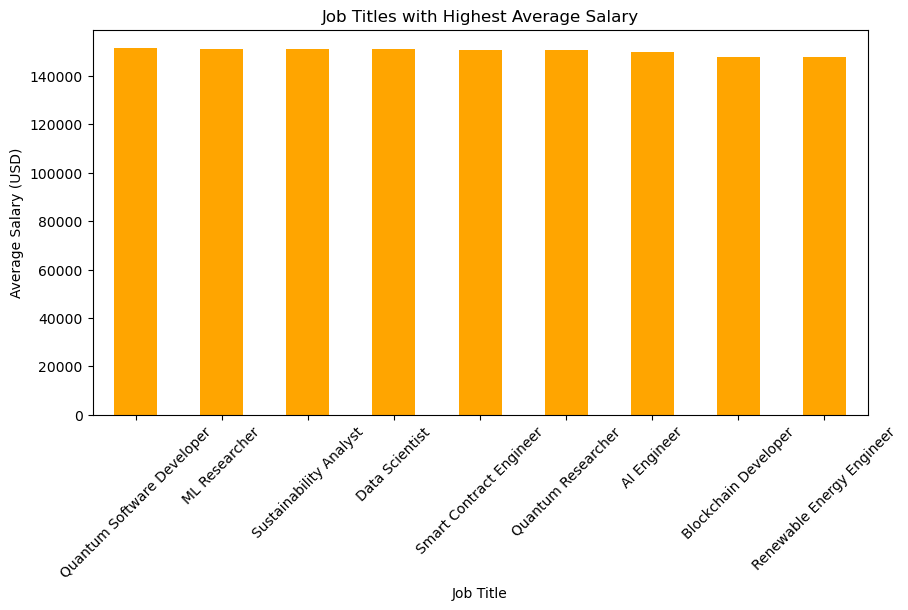

In [86]:
top10_jobs.plot(
    kind='bar',
    color='orange',
    figsize=(10,5)
)

plt.title('Job Titles with Highest Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()


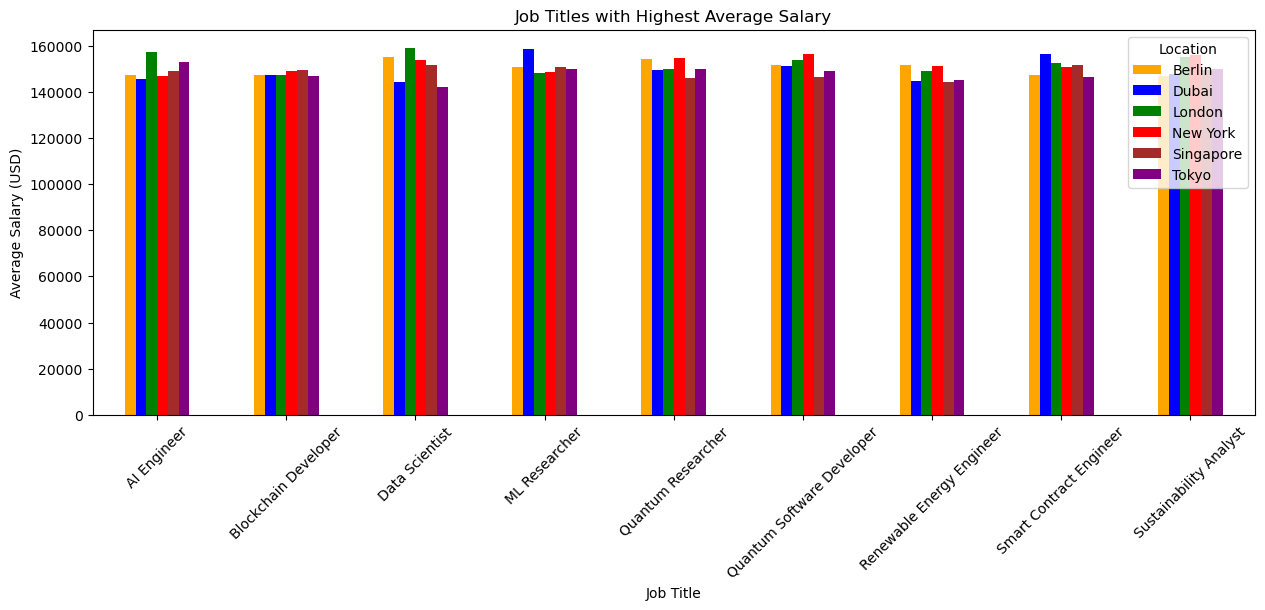

In [87]:
colors = [
    'orange', 'blue', 'green', 'red',
    'brown', 'purple'
]

pivot_table.plot(
    kind='bar',
    figsize=(15,5),
    color=colors
)

plt.title('Job Titles with Highest Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()



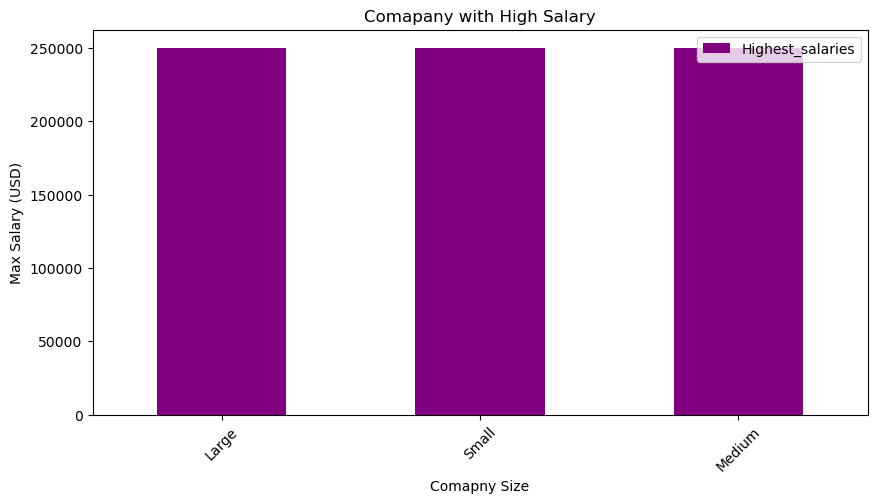

In [88]:
company_size_high_salary_df.plot(
    kind='bar',
    color='purple',
    figsize=(10,5)
)

plt.title('Comapany with High Salary')
plt.xlabel('Comapny Size')
plt.ylabel('Max Salary (USD)')
plt.xticks(rotation=45)
plt.show()


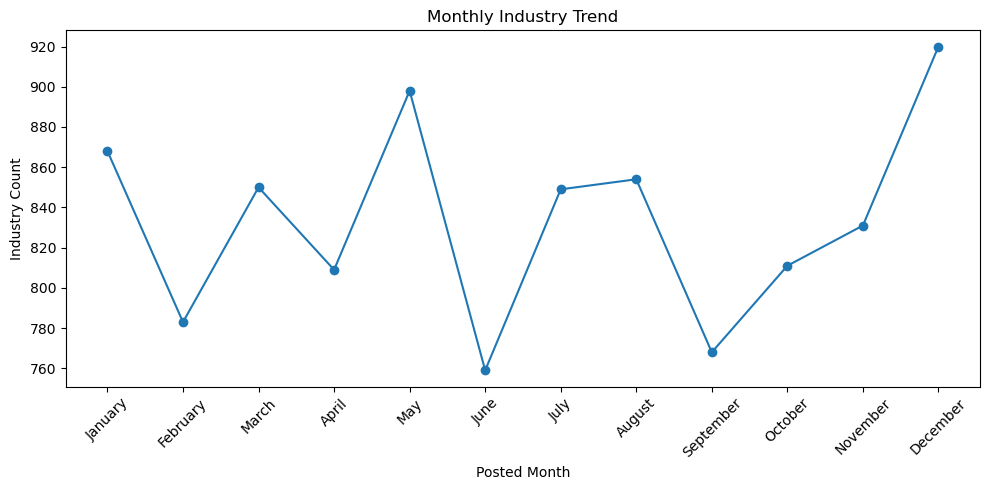

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(
    time_trend_df['Posted_month_name'],
    time_trend_df['Industry_count'],
    marker='o'
)
plt.xlabel('Posted Month')
plt.ylabel('Industry Count')
plt.title('Monthly Industry Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


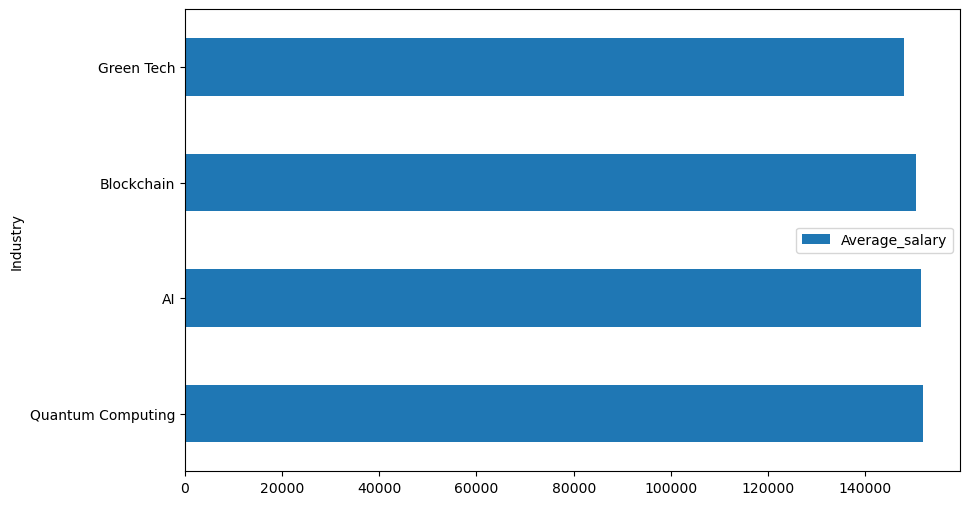

In [90]:
industy_salary_df.plot(
    x='Industry',
    y='Average_salary',
    kind='barh',
    figsize=(10, 6)
)
plt.show()


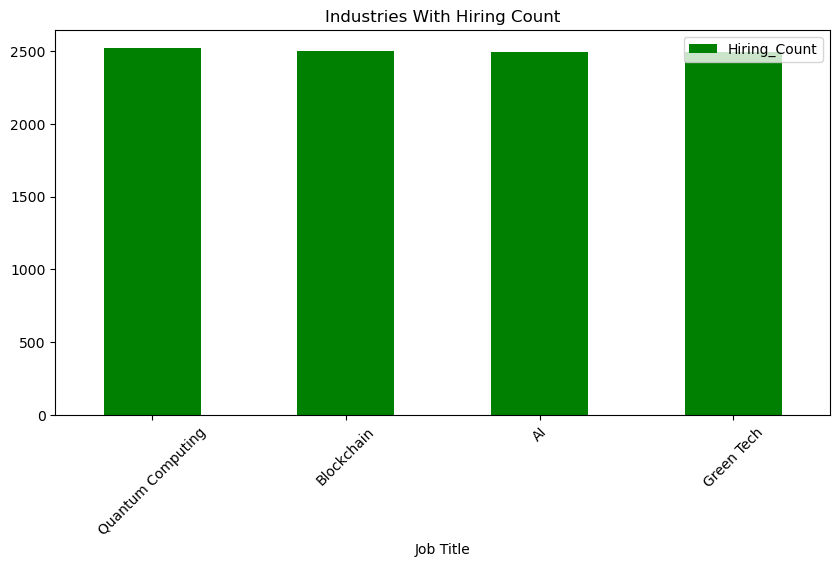

In [91]:
most_indusrty_hiring_month_df.plot(
    kind='bar',
    color='green',
    figsize=(10,5)
)

plt.title('Industries With Hiring Count')
plt.xlabel('Job Title')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

## **Refined Insights from the Analysis**

**Salary by Job Title**
- Quantum Software Developer has the highest average salary at 151,499, which is approximately 2.6% higher than          Renewable Energy Engineer, the lowest-paid role at 147,689.

**Impact of Location on Salary**
- Salary levels vary significantly by location, and the impact differs across industries, indicating that location       plays a role in compensation but is industry-dependent.

**Company Size and Salary**
- Large companies offer the highest maximum salary (249,990), which is only 0.002% higher than small companies          (249,985) and 0.015% higher than medium companies (249,952), suggesting company size has minimal impact on peak         salaries.

**Skills Linked to Higher Salaries**
- Quantum computing skills (Qiskit, Quantum Algorithms) are associated with the highest average salaries, followed by   AI/ML skills (Python, PyTorch, TensorFlow) and blockchain technologies (Solidity, Rust, Ethereum).

**Skills in Highest Demand**
- Energy Modeling and Climate Data Analysis are the most in-demand skills based on job posting counts.
  Industry Hiring Trends
- Quantum Computing is the most active hiring industry with 2,519 job postings, indicating the strongest demand among    all industries analyzed.

**Industry Salary Comparison**
- Quantum Computing also offers the highest average industry salary at 151,810, reinforcing its position as both a       high-demand and high-paying sector.

**Job Openings by Location**
- New York has the highest number of job openings, making it the most active job market in the dataset.
  Highest Paying Location
- Berlin offers the highest recorded salary at 249,893, indicating strong compensation potential despite fewer job       openings compared to New York.

**Hiring Trends Over Time**
- Hiring does not show a consistent upward or downward trend over time; instead, it follows a seasonal pattern,          peaking in December and mid-year months (May–August) and declining in June and September.